In [1]:
from fastai.vision.all import *
from PIL import ImageDraw
from PIL.Image import Transpose

In [2]:
data_dir = Path.home() / 'data/solar-panel'

In [5]:
image_files = get_image_files(data_dir/'images')

In [3]:
panels_path = data_dir / "panelsScreen.csv"
panels_df = pd.read_csv(panels_path, names=['img', 'panel', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4'])

In [6]:
# keep only the rows that have images
images_idxs = [int(o.stem.split('_')[-1]) for o in image_files]
# faults_df = faults_df.loc[faults_df['img'].isin(images_idxs)]
panels_df = panels_df.loc[panels_df['img'].isin(images_idxs)]

In [7]:
faults_path = data_dir / "faultsScreen.csv"
faults_df = pd.read_csv(faults_path, names=['img', 'panel', 'x', 'y', 'camera_distance', 'severity'])

In [ ]:
faults_df.head()

In [8]:
# get imgs (ids) that are present in both dfs
fault_imgs = faults_df['img'].unique()
panel_imgs = panels_df['img'].unique()
imgs = set(fault_imgs).intersection(set(panel_imgs))

In [9]:
def draw_circle(draw, x, y, r, **kwargs):
    top_left = (x-r, y-r)
    bottom_right = (x+r, y+r)
    return draw.ellipse([top_left, bottom_right], **kwargs)

In [30]:
# converts panels
for img in progress_bar(imgs):
    mask = np.zeros((908, 1614))
    mask = Image.fromarray(mask, mode="L")
    draw = ImageDraw.Draw(mask)

    # draw panels
    for i, row in panels_df[panels_df['img']==img].iterrows():
        points = [
            (row.x1, row.y1),
            (row.x2, row.y2),
            (row.x4, row.y4),
            (row.x3, row.y3),
        ]
        draw.polygon(points, fill=1)
        
    # draw defects
    for i, row in faults_df[faults_df['img']==img].iterrows():
        draw_circle(draw, row.x, row.y, 2*row.severity, fill=2)

    # original points lead to a reflected mask
    mask = mask.transpose(Transpose.FLIP_TOP_BOTTOM)
    
    save_path = data_dir / f"masks/screen_{img}.png"
    mask.save(str(save_path))

In [20]:
image_file

Path('/Users/lgvaz/data/solar-panel/images/screen_202.png')

In [13]:
image_file = data_dir / 'images' / f"screen_{int(row.img)}.png"
image = PILImage.create(image_file)

In [14]:
mask = PILMask(mask)

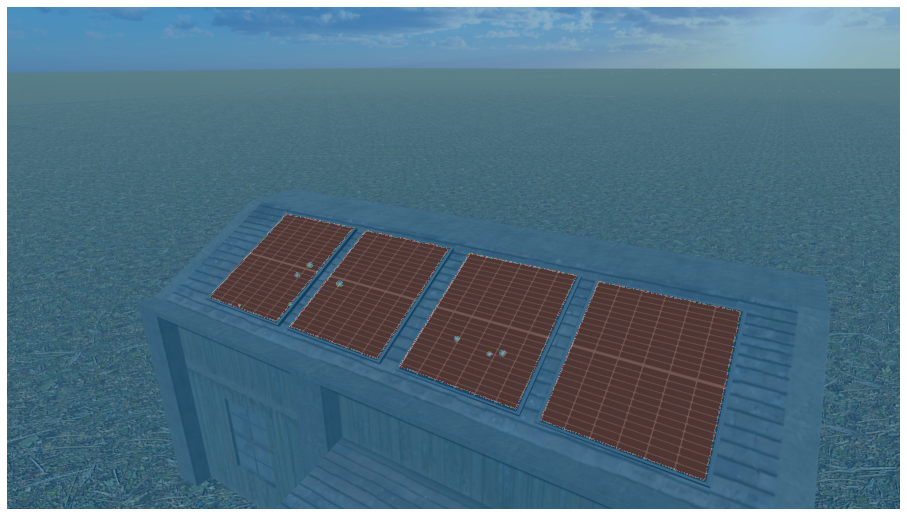

In [15]:
ctx = image.show(figsize=(16, 12))
ctx = mask.show(ctx=ctx)